## LAB-4
### Name: Harshitha Anishetty
### StudenID: 8903318

##### 1. Use the code provided below to get the data, and run the train-test split. Description of each column can be found in sklearn documentation. Look at the documentation for the load_diabetes method to know what are as_frame and scaled for.

In [125]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [126]:
# import dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,68.0,2.0,27.5,111.0,214.0,147.0,39.0,5.0,4.9416,91.0
66,46.0,2.0,24.7,85.0,174.0,123.2,30.0,6.0,4.6444,96.0
137,50.0,1.0,31.0,123.0,178.0,105.0,48.0,4.0,4.8283,88.0
245,41.0,1.0,23.1,86.0,148.0,78.0,58.0,3.0,4.0943,60.0
31,42.0,1.0,20.3,71.0,161.0,81.2,66.0,2.0,4.2341,81.0
...,...,...,...,...,...,...,...,...,...,...
106,22.0,1.0,19.3,82.0,156.0,93.2,52.0,3.0,3.9890,71.0
270,50.0,2.0,29.2,119.0,162.0,85.2,54.0,3.0,4.7362,95.0
348,57.0,1.0,24.5,93.0,186.0,96.6,71.0,3.0,4.5218,91.0
435,45.0,1.0,24.2,83.0,177.0,118.4,45.0,4.0,4.2195,82.0


In [127]:
def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(
        f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(
        f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

##### 2. Run a multivariate linear regression on all variables

In [128]:
# Train the model
linearModel = LinearRegression()
# fit the model with training sets
linearModel.fit(X_train, y_train)

LinearRegression()

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


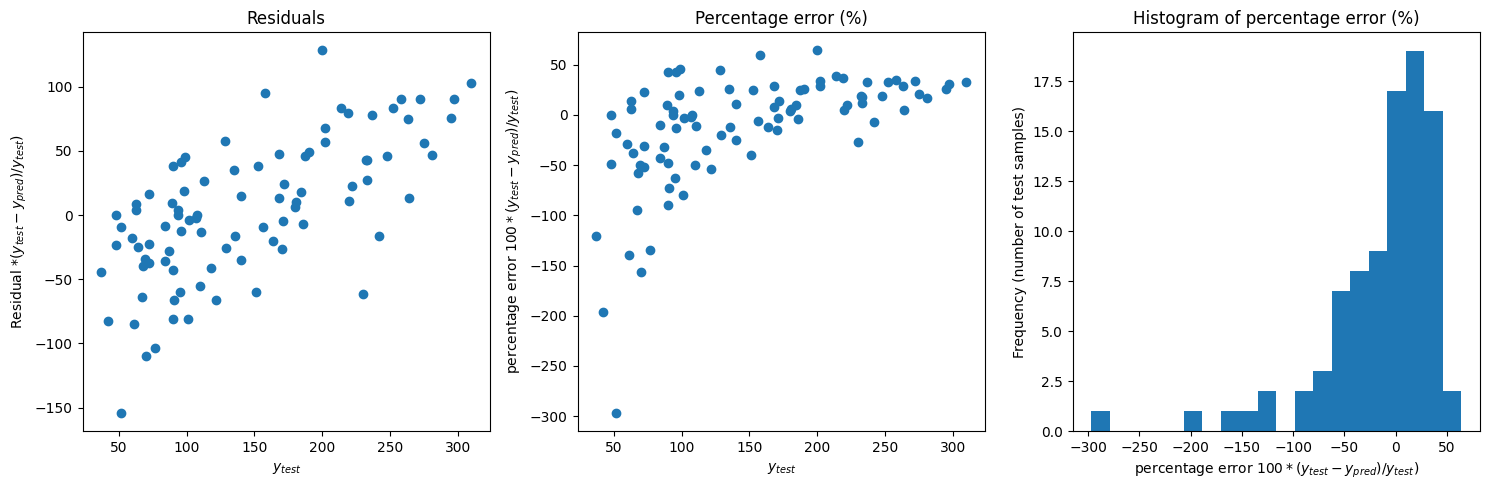

In [129]:
linear_y_pred_train = linearModel.predict(X_train)
linear_y_pred_test = linearModel.predict(X_test)
model_estimation(linearModel, y_train, y_test,
                 linear_y_pred_train, linear_y_pred_test)

##### 3. Run a multivariate polynomial regression of the 2nd degree on all variable

In [130]:
# Used pipeline here to solve the polynomial regression
polynomialModels = Pipeline([('polynomial', PolynomialFeatures(degree=2)),
                             ('linear', LinearRegression())])
polynomialModels.fit(X_train, y_train)
# polynomialModels.get_feature_names_out()

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])

Test Dataset: Mean Absolute Error: 58.73
Train Dataset: Mean Absolute Error: 51.86
y = -395723954028.01 * x_0 + -9.94 * x_1 + -11.85 * x_2 + -20.57 * x_3 + 10.39 * x_4 + -13.53 * x_5 + 23.36 * x_6 + 7.94 * x_7 + -160.94 * x_8 + -1807.19 * x_9 + -13.72 * x_10 + 0.03 * x_11 + 0.05 * x_12 + -0.12 * x_13 + 0.06 * x_14 + -0.03 * x_15 + -0.06 * x_16 + 0.23 * x_17 + 4.55 * x_18 + -2.45 * x_19 + -0.02 * x_20 + -35.55 * x_21 + 0.82 * x_22 + 0.05 * x_23 + 0.27 * x_24 + -1.74 * x_25 + 2.09 * x_26 + -26.77 * x_27 + 20.45 * x_28 + 1.45 * x_29 + -0.06 * x_30 + 0.18 * x_31 + -0.34 * x_32 + 0.40 * x_33 + 0.04 * x_34 + -3.22 * x_35 + 4.25 * x_36 + 0.28 * x_37 + 0.00 * x_38 + 0.14 * x_39 + -0.11 * x_40 + -0.15 * x_41 + 0.09 * x_42 + -2.57 * x_43 + -0.13 * x_44 + 0.16 * x_45 + -0.22 * x_46 + -0.36 * x_47 + -1.25 * x_48 + -5.38 * x_49 + 0.00 * x_50 + 0.05 * x_51 + 0.31 * x_52 + 1.75 * x_53 + 2.43 * x_54 + 0.03 * x_55 + 0.16 * x_56 + 0.72 * x_57 + 6.70 * x_58 + -0.08 * x_59 + 16.54 * x_60 + 13.98 * x_61 + 

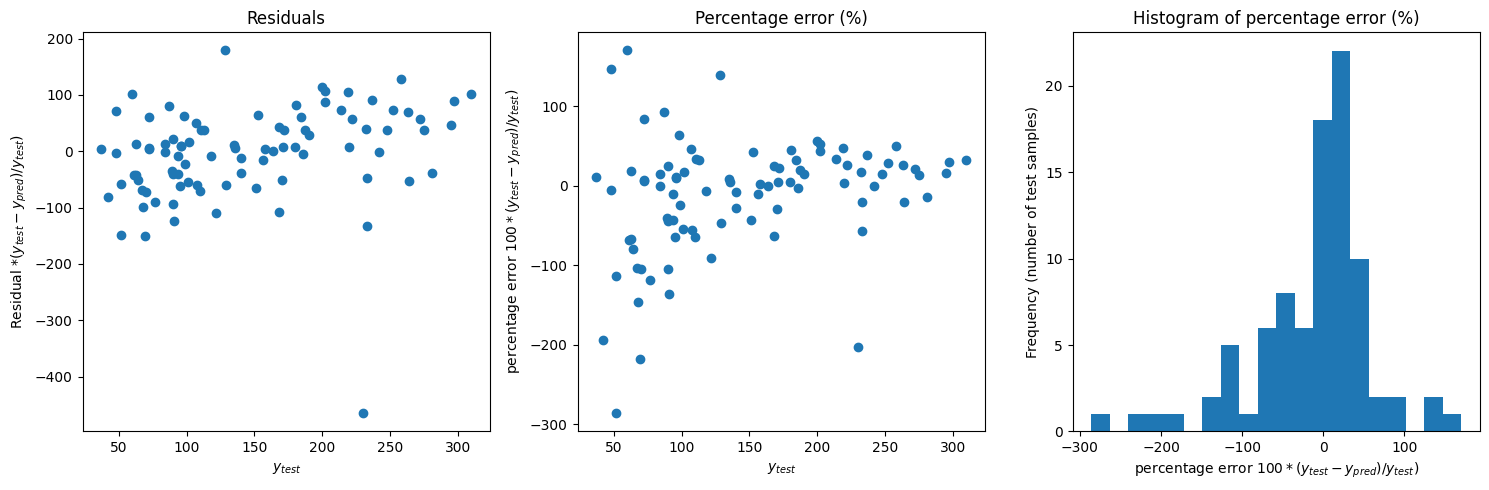

In [131]:
poly_y_pred_train = polynomialModels.predict(X_train)
poly_y_pred_test = polynomialModels.predict(X_test)
model_estimation(polynomialModels[1], y_train,
                 y_test, poly_y_pred_train, poly_y_pred_test)

##### 4.Compare the two models by looking at MAE and MAPE using the provided function 
##### 5. You can add any further comparisons and code

In [132]:
print(
    f'MAE of Linear Regression is {metrics.mean_squared_error(y_test, linear_y_pred_test)} ')
print(
    f'MAPE of Linear Regression is {metrics.mean_absolute_error(y_test, linear_y_pred_test):.2f}% ')

print(
    f'MAE of Polynomial Regression is {metrics.mean_squared_error(y_test, poly_y_pred_test)} ')
print(
    f'MAPE of Polynomial Regression is  {metrics.mean_absolute_error(y_test, poly_y_pred_test):.2f}% ')


MAE of Linear Regression is 2900.193628493484 
MAPE of Linear Regression is 42.79% 
MAE of Polynomial Regression is 6900.536787006293 
MAPE of Polynomial Regression is  58.73% 


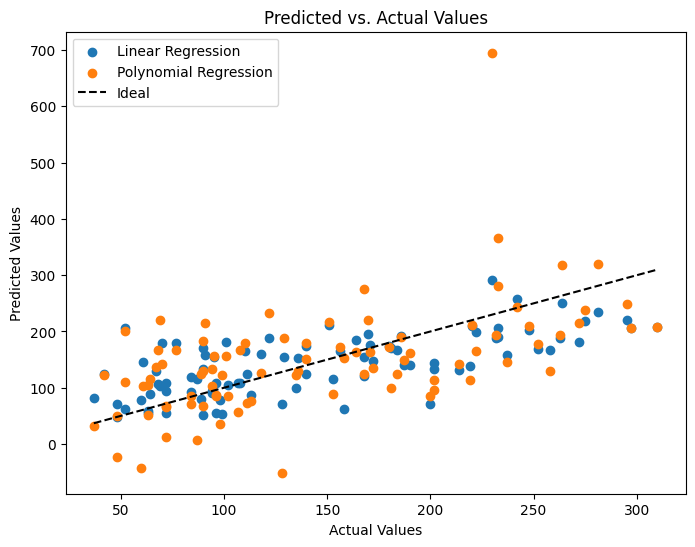

In [133]:
# plot linear and polynomial egression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_y_pred_test, label='Linear Regression')
plt.scatter(y_test, poly_y_pred_test, label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [
         min(y_test), max(y_test)], 'k--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

# QUESTIONS

### 1. How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out()

##### In linear regression, the number of parameters being fitted is equal to the number of input features (variables) plus one. This additional parameter is the intercept or bias term.

##### In polynomial regression, the number of parameters being fitted depends on the degree of the polynomial and the number of input features.
##### The number of parameters in polynomial regression can grow rapidly with higher degrees or a larger number of input features, which may increase the model's complexity and potential overfitting.

In [134]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X_train, y_train)
poly_features.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

### 2. Which model would you choose for deployment, and why?

##### The choice of the model for deployment depends on various factors, including the evaluation metrics, the specific requirements of the problem, and the trade-offs between model complexity and interpretability.

##### In this case, we have implemented both multivariate linear regression and multivariate polynomial regression. To make a decision, we need to compare their performance and consider other factors like Model complexity, Interpretability.

#####  if the performance of both models is similar and the relationships between features and the target variable are not expected to be highly nonlinear, choosing multivariate linear regression may be a sensible option. It offers simplicity, interpretability, and is less prone to overfitting compared to higher-degree polynomial regression.

##### However, if there are clear indications of nonlinear relationships or if the polynomial regression significantly outperforms the linear regression model, then deploying the polynomial regression model could be more appropriate.

### 3. What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

##### Let's analyze the insights we can draw from each of the plots in terms of the goodness-of-fit for the models:

##### Residuals Scatter Plot:

##### This plot shows the difference between the true target values (y_test) and the predicted target values (y_pred_test). The scatter plot of the residuals indicates the deviations between the actual and predicted values.
##### A good model would have residuals randomly scattered around zero, indicating that the model captures the patterns in the data. If the residuals exhibit a specific pattern, it suggests that the model might not adequately capture the underlying relationships or that there are other factors influencing the target variable.

##### Percentage Error Scatter Plot:

##### This plot shows the percentage error, calculated as the percentage difference between the true target values and the predicted target values. It provides insights into the magnitude of the errors relative to the true values.
##### Ideally, the scatter plot of the percentage error should show random scattering around zero, indicating that the model predictions have consistent errors across the entire range of target values. However, if there is a pattern or trend in the scatter plot, it suggests that the model is biased and has systematic errors.

##### Histogram of Percentage Error:

##### This histogram displays the distribution of the percentage errors. It helps understand the frequency of different magnitudes of errors.
##### A well-fitted model would have a histogram that is approximately symmetric and centered around zero. If the histogram exhibits skewness or a specific shape, it indicates that the model is consistently overestimating or underestimating the target variable across the test dataset.


##### By analyzing these plots and the MAE values, you can gain insights into the goodness-of-fit for each of the models. Look for patterns, trends, and the magnitude of errors to determine how well the models capture the relationships between the input features and the target variable. Lower MAE values suggest better model performance.